In [ ]:
import sympy as smp

## Dynamical Variables
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
theta = smp.symbols('theta', real = True) ## theta is the angle between r1 and r2 vector.

## To get theta (or more specifically, cos(theta))
x1 = smp.Function(r'x1')(r1, theta1, phi1)
x2 = smp.Function(r'x2')(r2, theta2, phi2)

y1 = smp.Function(r'y1')(r1, theta1, phi1)
y2 = smp.Function(r'y2')(r2, theta2, phi2)

z1 = smp.Function(r'z1')(r1, theta1)
z2 = smp.Function(r'z2')(r2, theta2)

## Wavefunction and Potential V
Psi = smp.Function('Psi')(r1, theta1, phi1, r2, theta2, phi2)
V = smp.Function('V')(r1, theta1, phi1, r2, theta2, phi2)

In [ ]:
## To define Hamiltonian operator

absolute_diff = smp.sqrt(r1**2 + r2**2 - 2*r1*r2*smp.cos(theta))  ## |r1 - r1|
V_eff = -2/r1 - 2/r2 + 1/(absolute_diff)  ## V = -2/r1 -2/r2 + 1/|r1-r2|

Laplacian = - 1/2 * (1/r1**2) * smp.diff(r1**2 * smp.diff(Psi, r1), r1) - 1/2 * (1/r2**2) * smp.diff(r2**2 * smp.diff(Psi, r2), r2) - 1/2 * (1/(r1**2 * smp.sin(theta1))) * smp.diff(smp.sin(theta1) * smp.diff(Psi, theta1), theta1) - 1/2 * (1/(r2**2 * smp.sin(theta2))) * smp.diff(smp.sin(theta2) * smp.diff(Psi, theta2), theta2) - 1/2 * (1/(r1**2 * smp.sin(theta1)**2)) * smp.diff(smp.diff(Psi, phi1), phi1) - 1/2 * (1/(r2**2 * smp.sin(theta2)**2)) * smp.diff(smp.diff(Psi, phi2), phi2)

Hamiltonian = V_eff*Psi + Laplacian

Hamiltonian

(1/sqrt(r1**2 - 2*r1*r2*cos(theta) + r2**2) - 2/r2 - 2/r1)*Psi(r1, theta1, phi1, r2, theta2, phi2) - 0.5*(r2**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r2, 2)) + 2*r2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r2))/r2**2 - 0.5*(sin(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta2, 2)) + cos(theta2)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta2))/(r2**2*sin(theta2)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi2, 2))/(r2**2*sin(theta2)**2) - 0.5*(r1**2*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (r1, 2)) + 2*r1*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), r1))/r1**2 - 0.5*(sin(theta1)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (theta1, 2)) + cos(theta1)*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), theta1))/(r1**2*sin(theta1)) - 0.5*Derivative(Psi(r1, theta1, phi1, r2, theta2, phi2), (phi1, 2))/(r1**2*sin(theta1)**2)

In [ ]:
x1 = r1 * smp.sin(theta1) * smp.cos(phi1)
x2 = r2 * smp.sin(theta2) * smp.cos(phi2)

y1 = r1 * smp.sin(theta1) * smp.sin(phi1)
y2 = r2 * smp.sin(theta2) * smp.sin(phi2)

z1 = r1 * smp.cos(theta1)
z2 = r2 * smp.cos(theta2)

# r1 and r2 vector in cartesian coordinates
r1_cartesian = smp.Matrix([x1, y1, z1])
r2_cartesian = smp.Matrix([x2, y2, z2])

# Compute the dot product
dot_product = r1_cartesian.dot(r2_cartesian)

# Compute the magnitude of r1 and r2
magnitude_r1 = smp.sqrt(x1**2 + y1**2 + z1**2)
magnitude_r2 = smp.sqrt(x2**2 + y2**2 + z2**2)

# Compute cos(theta) and sin(theta)
cos_theta = dot_product / (magnitude_r1 * magnitude_r2)
sin_theta = smp.sqrt(1 - cos_theta**2)

In [ ]:
## Defining 7 basis functions

Phi_1 = smp.Function('\Phi_1')(r1,theta1, phi1, r2, theta2, phi2)
Phi_1 = smp.exp(-2 * (r1 + r2))

Phi_2 = smp.Function('\Phi_2')(r1,theta1, phi1, r2, theta2, phi2)
Phi_2 = smp.exp(-2 * (r1 + r2)) * (r1 + r2)

Phi_3 = smp.Function('\Phi_3')(r1,theta1, phi1, r2, theta2, phi2)
Phi_3 = smp.exp(-2 * (r1 + r2)) * absolute_diff

In [ ]:
Phi_1 = Phi_1.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_2 = Phi_2.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)
Phi_3 = Phi_3.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)

Hamiltonian_modified = Hamiltonian.subs(smp.cos(theta), cos_theta).subs(smp.sin(theta), sin_theta)

## After this all 7 basis functions and Hamiltonian will depend on 6 dynamical variables. Before that, some functions were dependent on theta (cos(theta)).

In [ ]:
## proposed pdf
pdf = (Phi_1 + Phi_2 + Phi_3)**2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
pdf_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], pdf)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def p(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result_p = pdf_f(r1, theta1, phi1, r2, theta2, phi2)

        # Check for NaN or inf values
    if np.isnan(result_p) or np.isinf(result_p):
      return -np.inf

    else:
      return result_p

In [ ]:
# def metropolis_sampling(p, initial, num_samples, Range_value, std):

#   current_r1, current_theta1, current_phi1, current_r2, current_theta2, current_phi2 = initial
#   range_r, range_theta, range_phi = Range_value

#   current = initial
#   samples = []
#   num_accept = 0

#   for i in range(num_samples):
#     while True: ## This while loop is used to eliminate those samples for which Num or Den is infinity or Nan.

#       candidate_theta1 = np.random.uniform(0, np.pi)
#       candidate_theta2 = np.random.uniform(0, np.pi)

#       candidate_phi1 = np.random.uniform(0, 2*np.pi)
#       candidate_phi2 = np.random.uniform(0, 2*np.pi)

#       candidate_r1 = current_r1 + range_r * (np.random.uniform(0,1) - 0.5)
#       candidate_r2 = current_r2 + range_r * (np.random.uniform(0,1) - 0.5)

#       if candidate_theta1 > np.pi:
#         candidate_theta1 = np.pi - (candidate_theta1 - np.pi)

#       if candidate_theta2 > np.pi:
#         candidate_theta2 = np.pi - (candidate_theta2 - np.pi)

#       if candidate_theta1 < 0:
#         candidate_theta1 = -candidate_theta1

#       if candidate_theta2 < 0:
#         candidate_theta2 = -candidate_theta2

#       if candidate_phi1 > 2*np.pi:
#         candidate_phi1 = candidate_phi1 - 2*np.pi

#       if candidate_phi2 > 2*np.pi:
#         candidate_phi2 = candidate_phi2 - 2*np.pi

#       if candidate_phi1 < 0:
#         candidate_phi1 = -candidate_phi1

#       if candidate_phi2 < 0:
#         candidate_phi2 = -candidate_phi2

#       if (0 <= candidate_r1 and 0 <= candidate_r2):  ## If r1 or r2 is negative, then the candidate will be discarded and we will again start within while loop

#         candidate = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
#         candidate_value_p = p(candidate)

#         # Discard if candidate value is NaN or inf
#         if (candidate_value_p != -np.inf):
#           break

#     acceptance_prob = min(1, (p(candidate) / p(current)))

#     if np.random.uniform(0,1) < acceptance_prob: ## Candidate will be accepted
#       current_r1, current_r2 = candidate_r1, candidate_r2
#       current_theta1, current_theta2 = candidate_theta1, candidate_theta2
#       current_phi1, current_phi2 = candidate_phi1, candidate_phi2

#       current = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
#       num_accept += 1

#     samples.append(current)

#   return np.array(samples), num_accept

In [ ]:
# Monte Carlo integration
def monte_carlo_integration(samples, p,  Num, Den):

    Num_values = np.array([Num(sample) / p(sample) for sample in samples])
    Num_values = Num_values[~np.isnan(Num_values) & ~np.isinf(Num_values)]

    Den_values = np.array([Den(sample) / p(sample) for sample in samples])
    Den_values = Den_values[~np.isnan(Den_values) & ~np.isinf(Den_values)]

    values = np.mean(Num_values) / np.mean(Den_values)

    return values, np.mean(Num_values), np.mean(Den_values)

In [ ]:
import numpy as np
from multiprocessing import Pool

# Modified Metropolis Sampling Function to take num_samples as an input argument
def metropolis_sampling_parallel(args):
    p, initial, num_samples, range_value, std = args
    current_r1, current_theta1, current_phi1, current_r2, current_theta2, current_phi2 = initial
    range_r, range_theta, range_phi = range_value

    current = initial
    samples = []
    num_accept = 0

    for i in range(num_samples):
        while True:  # This while loop eliminates samples causing Num or Den to be NaN or Inf
            # candidate_theta1 = np.random.uniform(0, np.pi)
            # candidate_theta2 = np.random.uniform(0, np.pi)
            # candidate_phi1 = np.random.uniform(0, 2 * np.pi)
            # candidate_phi2 = np.random.uniform(0, 2 * np.pi)

            candidate_theta1 = current_theta1 + range_theta * (np.random.uniform(0, 1) - 0.5)
            candidate_theta2 = current_theta2 + range_theta * (np.random.uniform(0, 1) - 0.5)

            candidate_phi1 = current_phi1 + range_phi * (np.random.uniform(0, 1) - 0.5)
            candidate_phi2 = current_phi2 + range_phi * (np.random.uniform(0, 1) - 0.5)

            candidate_r1 = current_r1 + range_r * (np.random.uniform(0, 1) - 0.5)
            candidate_r2 = current_r2 + range_r * (np.random.uniform(0, 1) - 0.5)

            candidate_theta1 = max(0, min(np.pi, candidate_theta1))
            candidate_theta2 = max(0, min(np.pi, candidate_theta2))
            candidate_phi1 = candidate_phi1 % (2 * np.pi)
            candidate_phi2 = candidate_phi2 % (2 * np.pi)

            if candidate_r1 >= 0 and candidate_r2 >= 0:
                candidate = [candidate_r1, candidate_theta1, candidate_phi1, candidate_r2, candidate_theta2, candidate_phi2]
                candidate_value_p = p(candidate)

                if not np.isinf(candidate_value_p):
                    break

        acceptance_prob = min(1, (p(candidate) / p(current)))

        if np.random.uniform(0, 1) < acceptance_prob:
            current_r1, current_r2 = candidate_r1, candidate_r2
            current_theta1, current_theta2 = candidate_theta1, candidate_theta2
            current_phi1, current_phi2 = candidate_phi1, candidate_phi2
            current = candidate
            num_accept += 1

        samples.append(current)

    return np.array(samples), num_accept

def monte_carlo_parallel(p, initial, num_samples, range_value, std, Num, Den, num_processes=4):
    # Split the total samples across the processes
    samples_per_process = num_samples // num_processes

    # Create the arguments list for each parallel process
    args = [(p, initial, samples_per_process, range_value, std) for _ in range(num_processes)]

    # Create a pool of worker processes and run the Metropolis algorithm in parallel
    with Pool(processes=num_processes) as pool:
        # Each process runs the metropolis_sampling_parallel function
        results = pool.map(metropolis_sampling_parallel, args)

    # Combine the samples from all processes
    all_samples = np.concatenate([result[0] for result in results])

    # Perform Monte Carlo integration on combined samples
    values, mean_Num, mean_Den = monte_carlo_integration(all_samples, p, Num, Den)
    return values, mean_Num, mean_Den, all_samples


In [ ]:
# def MCI(samples, p, S):
#     S_values = np.array([S(sample) / p(sample) for sample in samples])
#     S_values = S_values[~np.isnan(S_values) & ~np.isinf(S_values)]

#     return np.mean(S_values)

# Function to perform Monte Carlo integration in parallel
def MCI_chunk(args):
    samples_chunk, p, S = args
    S_values = np.array([S(sample) / p(sample) for sample in samples_chunk])
    S_values = S_values[~np.isnan(S_values) & ~np.isinf(S_values)]
    return np.mean(S_values) if len(S_values) > 0 else 0

def MCI_parallel(samples, p, S, num_processes=4):
    # Split the samples into chunks for parallel processing
    chunk_size = len(samples) // num_processes
    chunks = [samples[i * chunk_size:(i + 1) * chunk_size] for i in range(num_processes)]

    # Create the arguments list for each process
    args = [(chunk, p, S) for chunk in chunks]

    # Create a pool of worker processes and calculate means in parallel
    with Pool(processes=num_processes) as pool:
        means = pool.map(MCI_chunk, args)

    # Compute the overall mean value from the means of all chunks
    overall_mean = np.mean(means)
    return overall_mean


## H_11

In [ ]:
H_Phi1 = Hamiltonian_modified.subs(Psi, Phi_1).simplify()

In [ ]:
Num_11 = (Phi_1 * H_Phi1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_11 = (Phi_1*Phi_1) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_11)
Den_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_11)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_11_2d = Num_11_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_11_2d = Den_11_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

pdf_2d = pdf_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*(-4.0*exp(-2*r1 - 2*r2) + 1.0*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)*sin(theta2)
<lambdifygenerated-1>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*((r1 + r2)*exp(-2*r1 - 2*r2) + sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))**2*sin(theta1)*sin(theta2)


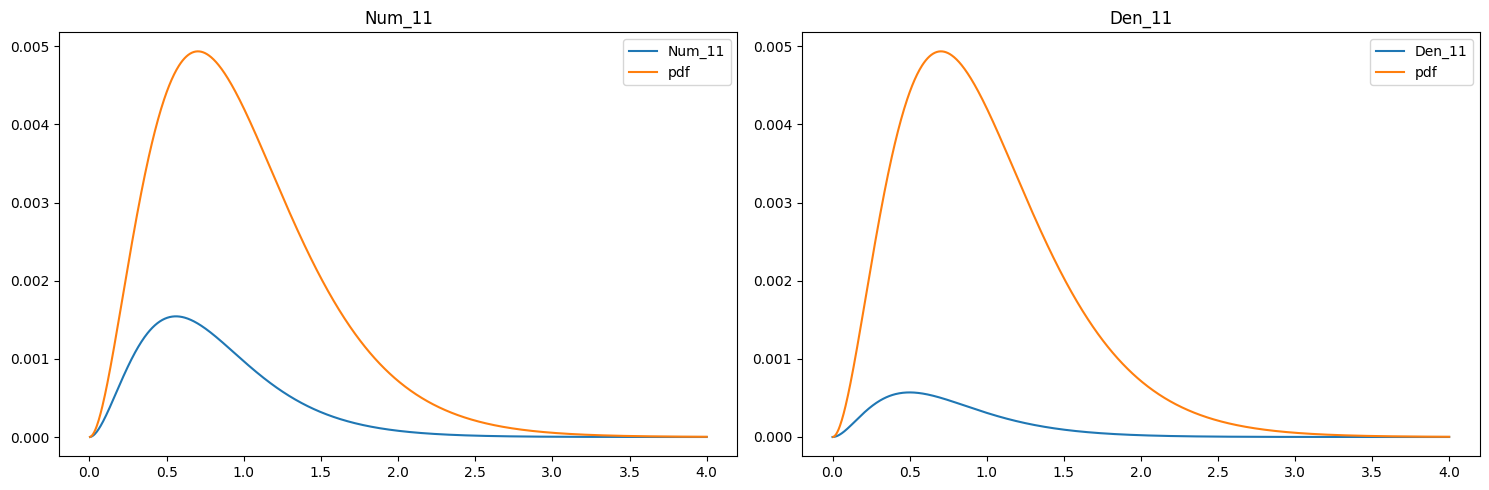

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_11_2d, Den_11_2d]
titles = ['Num_11', 'Den_11']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf_2d, label = 'pdf')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num11(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den11(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# Example usage
num_samples = 100000  # Total number of samples
initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
range_value = [0.25, 0.25, 0.25]
std = 0.225
num_processes = 4  # Number of parallel processes

# Call the parallel Monte Carlo function
values, mean_Num, mean_Den, samples = monte_carlo_parallel(p, initial, num_samples, range_value, std, Num11, Den11, num_processes)
E_p_11 = values
Den_p_11 = mean_Den
samples_p = samples
burn_in = 12000
samples_p = samples_p[burn_in:]
print("Monte Carlo Integration Result:", E_p_11)

Monte Carlo Integration Result: -2.9656088816106445


In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.789, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p = metropolis_sampling(p, initial, num_samples, Range_value, std)

# samples_p = result_p[0]
# num_accept_p = result_p[1]

# ## burn_in period
# burn_in = 12000
# samples_p = samples_p[burn_in:]

# E_p_11 = monte_carlo_integration(samples_p, p, Num11, Den11)[0]
# Den_p_11 = monte_carlo_integration(samples_p, p, Num11, Den11)[2]
# print(f"Estimated E using P2: {E_p_11}")
# print(f"Denominator using P2: {Den_p_11}")
# print("Number of Samples Collected: %s"%len(samples_p))
# print("Number of Samples Accepted: %s"%(num_accept_p))
# print("Fraction Acceptances: %s"%(num_accept_p / num_samples))
# print('')

In [ ]:
## Orthogonal vectors
u1_p = Phi_1 / np.sqrt(Den_p_11)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p_11 = u1_p*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p_11_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p_11)

In [ ]:
def S11_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p_11_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_11_p = MCI_parallel(samples_p, p, S11_p, num_processes)
print(f"Estimated S11 using P: {S_11_p}")

Estimated S11 using P: 0.2471903683079422


## H_12

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi2 = Hamiltonian_modified.subs(Psi, Phi_2).simplify()

Num_12 = (Phi_1 * H_Phi2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_12 = (Phi_1*Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_12)
Den_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_12)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_12_2d = Num_12_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_12_2d = Den_12_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-5>:2: RuntimeWarning: invalid value encountered in divide
  return (1.0*r1**3*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1**3*r2 + 1.0*r1**2*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 4.0*r1**2*r2**2*(r1 + r2 - 1)*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2) - 4.0*r1**2*r2**2 - 1.0*r1**2*r2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2) - 2.0*r1*r2**3 - 1.0*r1*r2**2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2))*exp(-4*r1 - 4*r2)*sin(theta1)*sin(theta2)


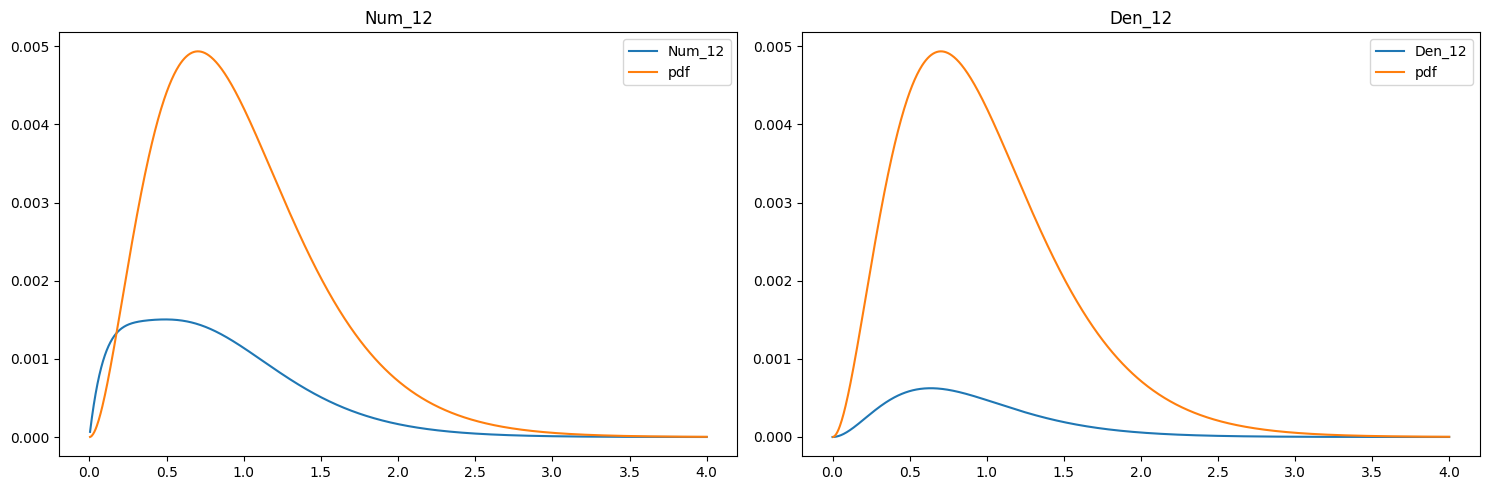

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_12_2d, Den_12_2d]
titles = ['Num_12', 'Den_12']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf_2d, label = 'pdf')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num12(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_12_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den12(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_12_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.789, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p = metropolis_sampling(p, initial, num_samples, Range_value, std)

# samples_p = result_p[0]
# num_accept_p = result_p[1]

# ## burn_in period
# burn_in = 12000
# samples_p = samples_p[burn_in:]

# E_p_12 = monte_carlo_integration(samples_p, p, Num12, Den12)[0]
# Den_p_12 = monte_carlo_integration(samples_p, p, Num12, Den12)[2]
# print(f"Estimated E using P2: {E_p_12}")
# print(f"Denominator using P2: {Den_p_12}")
# print("Number of Samples Collected: %s"%len(samples_p))
# print("Number of Samples Accepted: %s"%(num_accept_p))
# print("Fraction Acceptances: %s"%(num_accept_p / num_samples))
# print('')

# Call the parallel Monte Carlo function
values, mean_Num, mean_Den, samples = monte_carlo_parallel(p, initial, num_samples, range_value, std, Num12, Den12, num_processes)
E_p_12 = values
Den_p_12 = mean_Den
samples_p = samples
burn_in = 12000
samples_p = samples_p[burn_in:]
print("Monte Carlo Integration Result:", E_p_12)

Monte Carlo Integration Result: -2.9936553232153096


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p_12 = u1_p*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p_12_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p_12)

In [ ]:
def S12_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p_12_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_12_p = MCI_parallel(samples_p, p, S12_p, num_processes)
print(f"Estimated S12 using P2: {S_12_p}")

Estimated S12 using P2: 0.39730236887456094


## H_13

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)
H_Phi3 = Hamiltonian_modified.subs(Psi, Phi_3).simplify()

Num_13 = (Phi_1 * H_Phi3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_13 = (Phi_1*Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_13, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_13)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_13_2d = Num_13_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_13_2d = Den_13_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-8>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(-0.5*r1**2*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**2*(cos(phi1 - phi2)/(abs(r1)*abs(r2)) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*ab

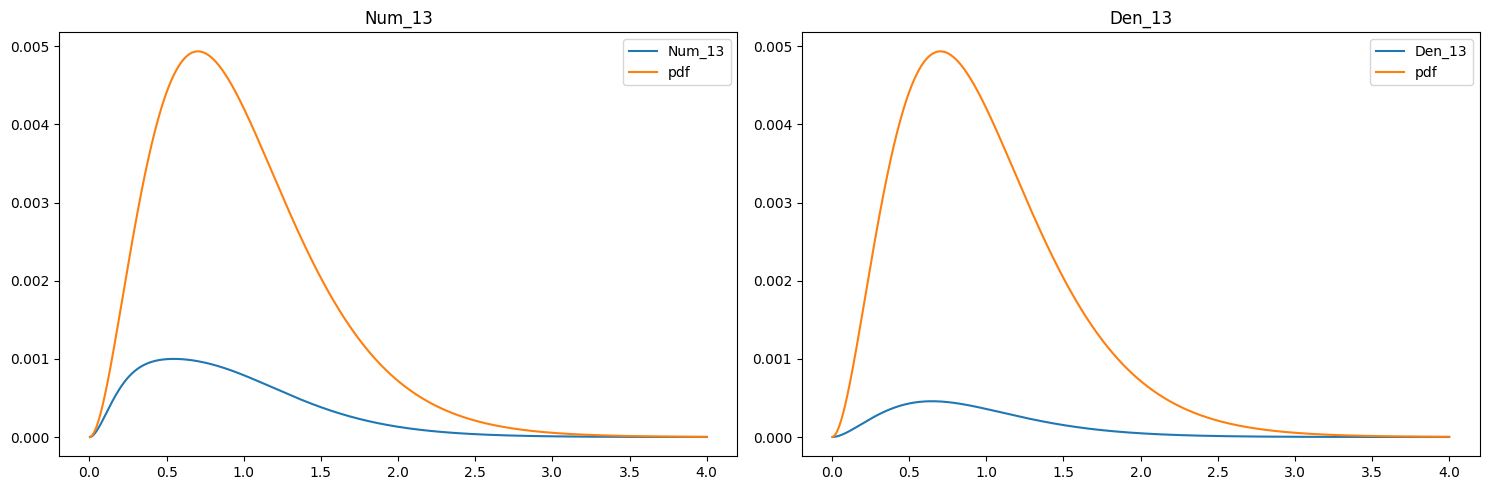

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_13_2d, Den_13_2d]
titles = ['Num_13', 'Den_13']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf_2d, label = 'pdf')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num13(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_13_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den13(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_13_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.789, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p = metropolis_sampling(p, initial, num_samples, Range_value, std)

# samples_p = result_p[0]
# num_accept_p = result_p[1]

# ## burn_in period
# burn_in = 12000
# samples_p = samples_p[burn_in:]

# E_p_13 = monte_carlo_integration(samples_p, p, Num13, Den13)[0]
# Den_p_13 = monte_carlo_integration(samples_p, p, Num13, Den13)[2]
# print(f"Estimated E using P: {E_p_13}")
# print(f"Denominator using P: {Den_p_13}")
# print("Number of Samples Collected: %s"%len(samples_p))
# print("Number of Samples Accepted: %s"%(num_accept_p))
# print("Fraction Acceptances: %s"%(num_accept_p / num_samples))
# print('')

# Call the parallel Monte Carlo function
values, mean_Num, mean_Den, samples = monte_carlo_parallel(p, initial, num_samples, range_value, std, Num13, Den13, num_processes)
E_p_13 = values
Den_p_13 = mean_Den
samples_p = samples
burn_in = 12000
samples_p = samples_p[burn_in:]
print("Monte Carlo Integration Result:", E_p_13)

Monte Carlo Integration Result: -2.6979020329337033


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p_13 = u1_p*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p_13_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p_13)

In [ ]:
def S13_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p_13_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_13_p = MCI_parallel(samples_p, p, S13_p, num_processes)
print(f"Estimated S13 using P: {S_13_p}")

Estimated S13 using P: 0.30703974727994976


## H_22

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_22 = (Phi_2 * H_Phi2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_22 = (Phi_2*Phi_2) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_22)
Den_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_22)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_22_2d = Num_22_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_22_2d = Den_22_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-11>:2: RuntimeWarning: invalid value encountered in divide
  return (r1 + r2)*(1.0*r1**3*r2**2/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 2.0*r1**3*r2 + 1.0*r1**2*r2**3/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 4.0*r1**2*r2**2*(r1 + r2 - 1)*exp(-2*r1 - 2*r2)*exp(2*r1 + 2*r2) - 4.0*r1**2*r2**2 - 1.0*r1**2*r2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2) - 2.0*r1*r2**3 - 1.0*r1*r2**2*(-2*(r1 + r2)*exp(-2*r1 - 2*r2) + exp(-2*r1 - 2*r2))*exp(2*r1 + 2*r2))*exp(-4*r1 - 4*r2)*sin(theta1)*sin(theta2)


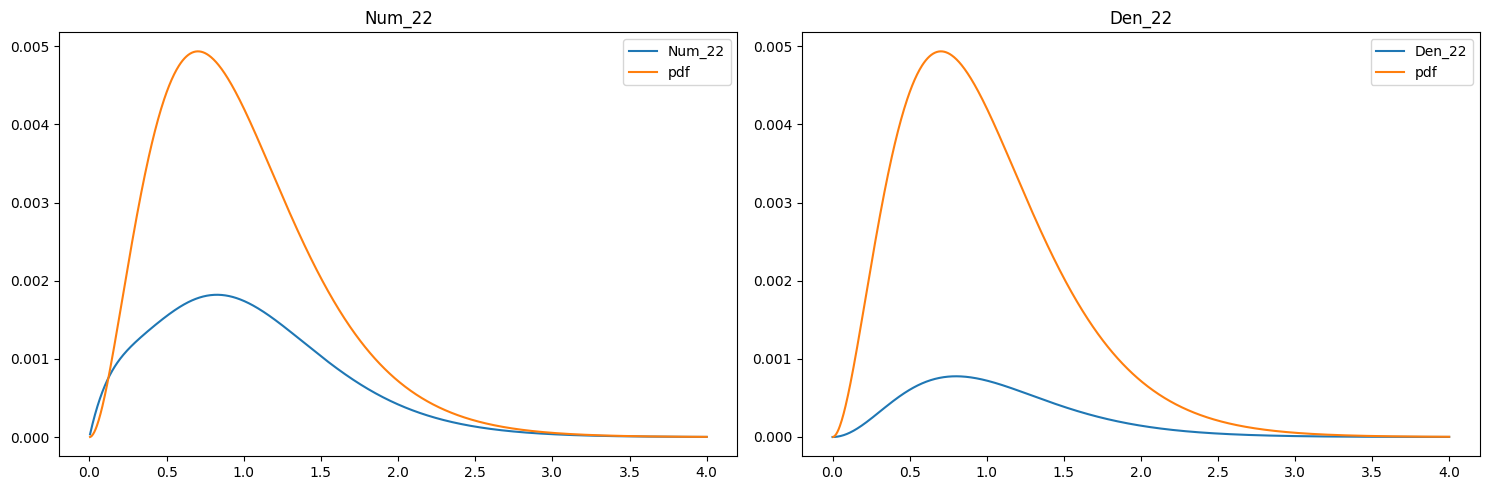

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_22_2d, Den_22_2d]
titles = ['Num_22', 'Den_22']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf_2d, label = 'pdf')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num22(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_22_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den22(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_22_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.789, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p = metropolis_sampling(p, initial, num_samples, Range_value, std)

# samples_p = result_p[0]
# num_accept_p = result_p[1]

# ## burn_in period
# burn_in = 12000
# samples_p = samples_p[burn_in:]

# E_p_22 = monte_carlo_integration(samples_p, p, Num22, Den22)[0]
# print(f"Estimated E using P: {E_p_22}")
# print("Number of Samples Collected: %s"%len(samples_p))
# print("Number of Samples Accepted: %s"%(num_accept_p))
# print("Fraction Acceptances: %s"%(num_accept_p / num_samples))
# print('')

# Call the parallel Monte Carlo function
values, mean_Num, mean_Den, samples = monte_carlo_parallel(p, initial, num_samples, range_value, std, Num22, Den22, num_processes)
E_p_22 = values
samples_p = samples
burn_in = 12000
samples_p = samples_p[burn_in:]
print("Monte Carlo Integration Result:", E_p_22)

Monte Carlo Integration Result: -2.819824868621679


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p = Phi_2*u1_p * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p)

def Num_p(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p = metropolis_sampling(p, initial, num_samples, Range_value, std)[0]
# samples_p = samples_p[burn_in:]

I_p = MCI_parallel(samples_p, p, Num_p, num_processes)

In [ ]:
u2_p = Phi_2 - (u1_p * I_p)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p = u2_p*u2_p * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm_p_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p)

def Norm_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I2 = MCI_parallel(samples_p, p, Norm_p, num_processes)

In [ ]:
u2_p = u2_p / np.sqrt(I2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p_21 = u2_p*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p_22 = u2_p*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p_21_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p_21)
S_p_22_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p_22)

In [ ]:
def S21_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p_21_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S22_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p_22_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_21_p = MCI_parallel(samples_p, p, S21_p, num_processes)
S_22_p = MCI_parallel(samples_p, p, S22_p, num_processes)

print(f"Estimated S21 using P: {S_21_p}")
print(f"Estimated S22 using P: {S_22_p}")

Estimated S21 using P: 0.004519377742910626
Estimated S22 using P: 0.16786232519064243


## H_23

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_23 = (Phi_2 * H_Phi3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_23 = (Phi_2*Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_23, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_23)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_23_2d = Num_23_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_23_2d = Den_23_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-17>:2: RuntimeWarning: divide by zero encountered in divide
  return r1**2*r2**2*(r1 + r2)*(-0.5*r1**2*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**2*(cos(phi1 - phi2)/(abs(r1)*abs(r2)) + sin(theta1)*sin(theta2)*sin(phi1 - phi2)**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)*sin(theta1)/(sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/

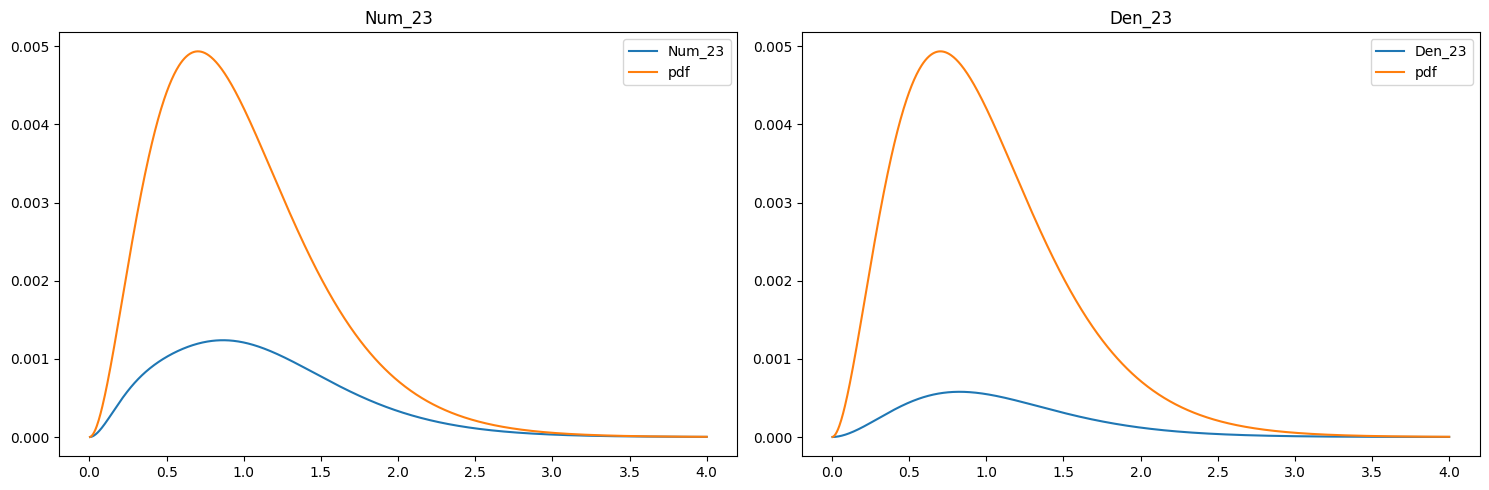

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_23_2d, Den_23_2d]
titles = ['Num_23', 'Den_23']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf_2d, label = 'pdf')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num23(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_23_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den23(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_23_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.789, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p = metropolis_sampling(p, initial, num_samples, Range_value, std)

# samples_p = result_p[0]
# num_accept_p = result_p[1]

# ## burn_in period
# burn_in = 12000
# samples_p = samples_p[burn_in:]

# E_p_23 = monte_carlo_integration(samples_p, p, Num23, Den23)[0]
# print(f"Estimated E using P: {E_p_23}")
# print("Number of Samples Collected: %s"%len(samples_p))
# print("Number of Samples Accepted: %s"%(num_accept_p))
# print("Fraction Acceptances: %s"%(num_accept_p / num_samples))
# print('')

# Call the parallel Monte Carlo function
values, mean_Num, mean_Den, samples = monte_carlo_parallel(p, initial, num_samples, range_value, std, Num23, Den23, num_processes)
E_p_23 = values
samples_p = samples
burn_in = 12000
samples_p = samples_p[burn_in:]
print("Monte Carlo Integration Result:", E_p_23)

Monte Carlo Integration Result: -2.666377121442765


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p_23 = u2_p*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p_23_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p_23)

In [ ]:
def S23_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p_23_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_23_p = MCI_parallel(samples_p, p, S23_p, num_processes)
print(f"Estimated S23 using P: {S_23_p}")

Estimated S23 using P: 0.13130312514751308


## H_33

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_33 = (Phi_3 * H_Phi3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Den_33 = (Phi_3*Phi_3) * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

In [ ]:
Num_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_33, modules=['numpy', {'DiracDelta': lambda x: np.where(x!=0, 0, float('inf'))}])
Den_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Den_33)

In [ ]:
## This is done to plot graphs. This will have no  impact while performing metropolis algorithm.

r1 = np.linspace(0, 4, 1000)
r2 = np.linspace(0, 4, 1000)

theta1 = np.linspace(0, np.pi, 1000)
theta2 = np.linspace(0, np.pi, 1000)

phi1 = np.linspace(0, 2*np.pi, 1000)
phi2 = np.linspace(0, 2*np.pi, 1000)

In [ ]:
Num_33_2d = Num_33_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)
Den_33_2d = Den_33_f(r1, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6)

<lambdifygenerated-20>:2: RuntimeWarning: invalid value encountered in divide
  return r1**2*r2**2*sqrt(r1**2 - 2*r1*r2*(r1*r2*sin(phi1)*sin(phi2)*sin(theta1)*sin(theta2) + r1*r2*sin(theta1)*sin(theta2)*cos(phi1)*cos(phi2) + r1*r2*cos(theta1)*cos(theta2))/(sqrt(r1**2*sin(phi1)**2*sin(theta1)**2 + r1**2*sin(theta1)**2*cos(phi1)**2 + r1**2*cos(theta1)**2)*sqrt(r2**2*sin(phi2)**2*sin(theta2)**2 + r2**2*sin(theta2)**2*cos(phi2)**2 + r2**2*cos(theta2)**2)) + r2**2)*(-0.5*r1**2*((sin(theta1)*sin(theta2)*cos(phi1 - phi2) + cos(theta1)*cos(theta2))/(abs(r1)*abs(r2)) + (sin(theta1)*cos(theta2)*cos(phi1 - phi2) - sin(theta2)*cos(theta1))**2/(2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) + 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) - r1**2 - r2**2))*exp(-2*r1 - 2*r2)/sqrt(-2*r1**2*r2**2*sin(theta1)*sin(theta2)*cos(phi1 - phi2)/(abs(r1)*abs(r2)) - 2*r1**2*r2**2*cos(theta1)*cos(theta2)/(abs(r1)*abs(r2)) + r1**2 + r2**2) - 0.5*r1**2*(cos(phi1 - phi2)/(abs(r1)*

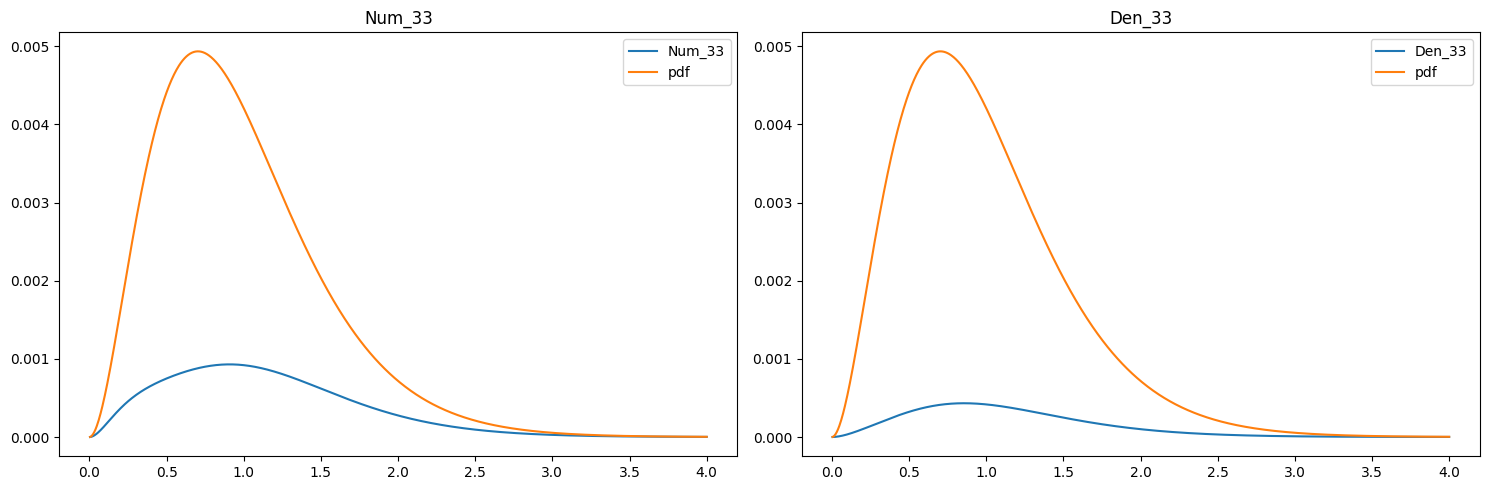

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of y data to plot
functions = [-Num_33_2d, Den_33_2d]
titles = ['Num_33', 'Den_33']

# Plot each y data on a subplot
for i, ax in enumerate(axes):
    ax.plot(r1 , functions[i], label = titles[i])
    # ax.plot(r1, pdf1_2d, label = 'pdf1')
    ax.plot(r1, pdf_2d, label = 'pdf')
    ax.set_title(titles[i])
    ax.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
def Num33(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_33_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def Den33(X):
    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Den_33_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
# initial = [0.333, np.pi/4, np.pi/3, 0.529, 3*np.pi/4, np.pi/6]
# Range_value = [0.789, 0.75, 0.75]
# std = 0.225
# num_samples = 100000

# # Run Metropolis sampling
# result_p = metropolis_sampling(p, initial, num_samples, Range_value, std)

# samples_p = result_p[0]
# num_accept_p = result_p[1]

# ## burn_in period
# burn_in = 12000
# samples_p = samples_p[burn_in:]

# E_p_33 = monte_carlo_integration(samples_p, p, Num33, Den33)[0]
# print(f"Estimated E using P: {E_p_33}")
# print("Number of Samples Collected: %s"%len(samples_p))
# print("Number of Samples Accepted: %s"%(num_accept_p))
# print("Fraction Acceptances: %s"%(num_accept_p / num_samples))
# print('')

# Call the parallel Monte Carlo function
values, mean_Num, mean_Den, samples = monte_carlo_parallel(p, initial, num_samples, range_value, std, Num33, Den33, num_processes)
E_p_33 = values
samples_p = samples

burn_in = 12000
samples_p = samples_p[burn_in:]
print("Monte Carlo Integration Result:", E_p_33)

Monte Carlo Integration Result: -2.5172946008411485


In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p = Phi_3*u1_p * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p)

def Num_p(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p = metropolis_sampling(p, initial, num_samples, Range_value, std)[0]
# samples_p = samples_p[burn_in:]

I1_p = MCI_parallel(samples_p, p, Num_p, num_processes)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Num_p = Phi_3*u2_p * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Num_p_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Num_p)

def Num_p(X):
    r1, theta1, phi1, r2, theta2, phi2 = X  # Here X is a vector with 6 components

    result = Num_p_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

# samples_p = metropolis_sampling(p, initial, num_samples, Range_value, std)[0]
# samples_p = samples_p[burn_in:]

I2_p = MCI_parallel(samples_p, p, Num_p, num_processes)

In [ ]:
u3_p = Phi_3 - (I2_p * u2_p) - (I1_p * u1_p)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

Norm__p = u3_p*u3_p * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
Norm_p_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], Norm__p)

def Norm_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = Norm_p_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

I2 = MCI_parallel(samples_p, p, Norm_p, num_processes)

In [ ]:
u3_p = u3_p / np.sqrt(I2)

In [ ]:
r1, theta1, phi1, r2, theta2, phi2 = smp.symbols('r1 theta1 phi1 r2 theta2 phi2', real = True)

S_p_31 = u3_p*Phi_1 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p_32 = u3_p*Phi_2 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)
S_p_33 = u3_p*Phi_3 * r1**2 * r2**2 * smp.sin(theta1) * smp.sin(theta2)

S_p_31_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p_31)
S_p_32_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p_32)
S_p_33_f = smp.lambdify([r1, theta1, phi1, r2, theta2, phi2], S_p_33)

In [ ]:
def S31_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p_31_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S32_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p_32_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

def S33_p(X):

    r1, theta1, phi1, r2, theta2, phi2 = X

    result = S_p_33_f(r1, theta1, phi1, r2, theta2, phi2)

    # Check for NaN or inf values
    if np.isnan(result) or np.isinf(result):
      return -np.inf  ## The function will return -infinity if the result is either nan (0/0 or oo/oo) or infinity.

    else:
      return result

In [ ]:
S_31_p = MCI_parallel(samples_p, p, S31_p, num_processes)
S_32_p = MCI_parallel(samples_p, p, S32_p, num_processes)
S_33_p = MCI_parallel(samples_p, p, S33_p, num_processes)

In [ ]:
print(f"Estimated S31 using P: {S_31_p}")
print(f"Estimated S32 using P: {S_32_p}")
print(f"Estimated S33 using P: {S_33_p}")

Estimated S31 using P: -0.00041940913860686333
Estimated S32 using P: -0.01228909135149943
Estimated S33 using P: 0.06702721042601414


## Matrix Diagonalization and Minimum Energy Eigenvalue

In [ ]:
H_non_orth_P2 = np.matrix([[E_p_11, E_p_12, E_p_13],
                           [E_p_12, E_p_22, E_p_23],
                           [E_p_13, E_p_23, E_p_33]])

S_p2 = np.matrix([[S_11_p, S_12_p, S_13_p],
                  [S_21_p, S_22_p, S_23_p],
                  [S_31_p, S_32_p, S_33_p]])

H_orth_p2 = S_p2 @ H_non_orth_P2 @ S_p2.getH()
eigenvalues_p2, eigenvectors_p2 = np.linalg.eigh(H_orth_p2)
eigenvalues_p2

array([-2.76741027e+00, -2.77390700e-04,  5.71252948e-04])

In [ ]:
print(min(eigenvalues_p2))

# -2.7816033796174806
# -2.7928980175137714
# -2.7565618867181616
# -2.7975356599912287
# -2.8525575593313577

-2.7674102703028436
